In [5]:
from pathlib import Path
import pandas as pd
import re

from scipy.io.arff import loadarff

In [6]:
path_with_files = Path(r"C:\Users\zbenm\Mammals")

In [7]:
file = "mammals.arff"
#file = "commonmammals.arff"

data, meta = loadarff(path_with_files / file)

In [8]:
df = pd.DataFrame(data); df.shape

(2221, 193)

In [9]:
df.head()

,latitude,longitude,mean_temp_jan_utm,mean_temp_feb_utm,mean_temp_march_utm,mean_temp_april_utm,mean_temp_may_utm,mean_temp_jun_utm,mean_temp_jul_utm,mean_temp_aug_utm,...,Sus_scrofa,Talpa_caeca,Talpa_europaea,Talpa_occidentalis,Talpa_romana,Talpa_stankovici,Tamias_sibiricus,Ursus_arctos,Vormela_peregusna,Vulpes_vulpes
0,38.62,-9.29,11.05,11.81,13.12,14.79,16.76,19.43,21.53,21.82,...,b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'1'
1,39.52,-9.29,11.01,11.51,12.96,14.49,15.90,18.10,19.25,19.61,...,b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
2,39.07,-9.29,10.64,11.21,12.64,14.30,15.86,18.27,19.80,20.09,...,b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'1'
3,36.82,-8.16,11.90,12.60,13.75,15.25,17.70,20.70,23.25,23.45,...,b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'1'
4,37.72,-8.72,11.34,11.93,13.16,14.73,17.03,20.04,22.49,22.80,...,b'1',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'1'


In [10]:
columns = df.columns

r = re.compile('^bio')
bio_columns = [col for col in columns if r.match(col)]

r = re.compile('^[A-Z]')
mammal_columns = [col for col in columns if r.match(col)]

location_columns = ['latitude', 'longitude']

monthly_columns = [col for col in columns if col not in set(mammal_columns) | set(bio_columns) | set(location_columns)]

In [11]:
df['cell_id'] = df.index

In [12]:
df_grid_cell = df[['cell_id'] + location_columns + bio_columns]; df_grid_cell.shape

(2221, 22)

In [13]:
df_grid_cell.head()

,cell_id,latitude,longitude,bioclim1_utm,bioclim2_utm,bioclim3_utm,bioclim4_utm,bioclim5_utm,bioclim6_utm,bioclim7_utm,...,bioclim10_utm,bioclim11_utm,bioclim12_utm,bioclim13_utm,bioclim14_utm,bioclim15_utm,bioclim16_utm,bioclim17_utm,bioclim18_utm,bioclim19_utm
0,0,38.62,-9.29,16.22,7.88,41.66,403.27,26.86,7.94,18.91,...,21.38,11.46,732.14,111.86,4.00,67.23,328.00,31.00,33.43,312.43
1,1,39.52,-9.29,15.38,6.19,42.00,317.99,22.87,8.15,14.72,...,19.21,11.43,694.75,113.25,4.00,64.82,304.00,31.00,38.00,285.00
2,2,39.07,-9.29,15.33,6.69,41.33,352.60,23.94,7.76,16.19,...,19.69,11.02,735.78,116.44,4.11,66.22,327.89,31.44,35.44,307.22
3,3,36.82,-8.16,17.28,9.04,43.26,429.32,28.70,7.80,20.90,...,22.88,12.40,501.00,87.00,1.00,75.07,246.00,14.00,17.00,229.00
4,4,37.72,-8.72,16.62,9.18,43.36,430.17,28.87,7.70,21.17,...,22.23,11.70,565.71,86.00,1.71,68.93,256.57,22.14,23.14,248.14


In [14]:
df_monthly_v1 = df[['cell_id'] + monthly_columns]; df_monthly_v1.shape

(2221, 49)

In [15]:
df_monthly_v1.head()

,cell_id,mean_temp_jan_utm,mean_temp_feb_utm,mean_temp_march_utm,mean_temp_april_utm,mean_temp_may_utm,mean_temp_jun_utm,mean_temp_jul_utm,mean_temp_aug_utm,mean_temp_sep_utm,...,prec_march_utm,prec_april_utm,prec_may_utm,prec_jun_utm,prec_jul_utm,prec_aug_utm,prec_sep_utm,prec_oct_utm,prec_nov_utm,prec_dec_utm
0,0,11.05,11.81,13.12,14.79,16.76,19.43,21.53,21.82,20.80,...,83.14,54.86,44.14,20.86,4.00,6.14,23.29,72.43,110.86,111.71
1,1,11.01,11.51,12.96,14.49,15.90,18.10,19.25,19.61,18.78,...,59.50,60.75,47.75,21.50,4.00,5.50,28.50,69.00,113.25,86.50
2,2,10.64,11.21,12.64,14.30,15.86,18.27,19.80,20.09,19.19,...,79.22,58.11,47.89,21.33,4.11,6.00,25.33,70.11,116.44,103.22
3,3,11.90,12.60,13.75,15.25,17.70,20.70,23.25,23.45,21.95,...,50.00,36.00,24.00,12.00,1.00,1.00,15.00,58.00,75.00,84.00
4,4,11.34,11.93,13.16,14.73,17.03,20.04,22.49,22.80,21.41,...,55.00,45.14,30.00,17.14,1.71,3.29,18.14,62.00,85.14,85.57


In [16]:
df_monthly_v2 = df_monthly_v1.melt(id_vars=['cell_id']); df_monthly_v2.shape

(106608, 3)

In [17]:
df_monthly_v2.head()

,cell_id,variable,value
0,0,mean_temp_jan_utm,11.05
1,1,mean_temp_jan_utm,11.01
2,2,mean_temp_jan_utm,10.64
3,3,mean_temp_jan_utm,11.90
4,4,mean_temp_jan_utm,11.34


In [18]:
df_monthly_v2[['statistics', 'month']] = pd.DataFrame.from_records(
    df_monthly_v2['variable'].str.split('_').apply(lambda l: ('_'.join(l[:-2]), '_'.join(l[-2:])))
); df_monthly_v2.shape

(106608, 5)

In [19]:
df_monthly_v2.head()

,cell_id,variable,value,statistics,month
0,0,mean_temp_jan_utm,11.05,mean_temp,jan_utm
1,1,mean_temp_jan_utm,11.01,mean_temp,jan_utm
2,2,mean_temp_jan_utm,10.64,mean_temp,jan_utm
3,3,mean_temp_jan_utm,11.90,mean_temp,jan_utm
4,4,mean_temp_jan_utm,11.34,mean_temp,jan_utm


In [20]:
df_monthly_v3 = df_monthly_v2.pivot(values='value',
                   index=['cell_id', 'month'],
               columns=['statistics']).reset_index(); df_monthly_v3.shape

(26652, 6)

In [21]:
df_monthly_v3.head()

statistics,cell_id,month,max_temp,mean_temp,min_temp,prec
0,0,april_utm,18.69,14.79,10.90,54.86
1,0,aug_utm,26.86,21.82,16.79,6.14
2,0,dec_utm,14.41,11.51,8.61,111.71
3,0,feb_utm,15.04,11.81,8.57,95.29
4,0,jan_utm,14.16,11.05,7.94,105.43


In [22]:
df_mammals_v1 = df[['cell_id'] + mammal_columns]; df_mammals_v1.shape

(2221, 125)

In [23]:
df_mammals_v1.head()

,cell_id,Acomys_minous,Alces_alces,Alopex_lagopus,Apodemus_agrarius,Apodemus_alpicola,Apodemus_flavicollis,Apodemus_mystacinus,Apodemus_sylvaticus,Apodemus_uralensis,...,Sus_scrofa,Talpa_caeca,Talpa_europaea,Talpa_occidentalis,Talpa_romana,Talpa_stankovici,Tamias_sibiricus,Ursus_arctos,Vormela_peregusna,Vulpes_vulpes
0,0,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',...,b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'1'
1,1,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',...,b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0'
2,2,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',...,b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'1'
3,3,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',...,b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'1'
4,4,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',...,b'1',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'1'


In [24]:
df_mammals_v2 = df_mammals_v1.melt(id_vars='cell_id'); df_mammals_v2.shape

(275404, 3)

In [25]:
df_mammals_v2.head()

,cell_id,variable,value
0,0,Acomys_minous,b'0'
1,1,Acomys_minous,b'0'
2,2,Acomys_minous,b'0'
3,3,Acomys_minous,b'0'
4,4,Acomys_minous,b'0'


In [26]:
df_mammals_v2['value'] = df_mammals_v2['value'] == b'1'

In [27]:
df_mammals_v2['value'].describe()

count     275404
unique         2
top        False
freq      220954
Name: value, dtype: object

In [28]:
how_many_mammals = (
    df_mammals_v2
    .groupby('cell_id')
    .agg(count_animals=('value', 'sum'))
    .sort_values('count_animals', ascending=False)
)

In [29]:
# for example, now we want to show a map with the number of animals,
# and see if it makes sense (my intuition, near cities less animals, rural places more mammals)

In [30]:
# I'm going to build a primitive map, and later with Streamlit, I'll use more aqurate maps that they suggest to use.

In [31]:
import matplotlib.pyplot as plt

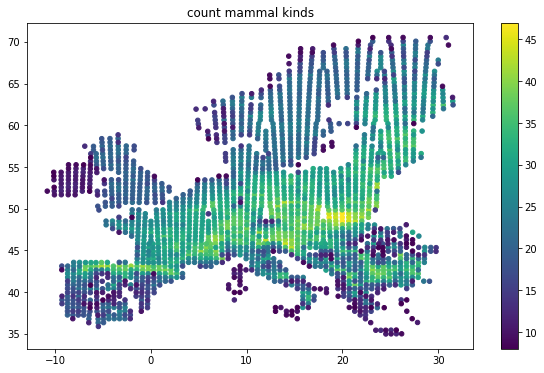

In [32]:
merged_df = how_many_mammals.merge(df_grid_cell, on='cell_id')

x, y, count = merged_df['longitude'], merged_df['latitude'], merged_df['count_animals']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c = count, s=20)
plt.title('count mammal kinds')
plt.colorbar()
plt.show();